<a href="https://colab.research.google.com/github/junsookim76/Ewha_2023/blob/main/5_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023_05_03 

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# <font color=crimson>Table of Contents</font>

* __1-Dim Random Walk__
>
>1. How to use 'random.rand'
>2. Calculating the mean square displacement (MSD) after 700 steps 
>3. Plotting the MSD as a function of steps
>4. Repeating the same calculation for many different sets
>5. Plotting the MSD as a function of steps
>6. Calculating the diffusion coefficient by fitting the MSD to a linear line
>
* __3-Dim Random Walk__
>
>1. Calculating the MSD by performing many sets of random walks
>2. Calculating the diffusion coefficient by fitting the MSD to a linear line 
>


# <font color=crimson>1-Dim Random Walk</font>

## 1. How to use 'random.rand'

>from numpy import random
> 
> random.rand(nsteps) 
>>nsteps개의 random number 생성
>>
>>Uniform distribution with \[0,1)
>
> np.round: 반올림
>
> delx = 2 * [ ((randnum)의 반올림) - 0.5 ]
>>-1 또는 1의 값을 생성

(700,)
[-1.  1. -1. -1.  1. -1.  1.  1.  1.  1.]


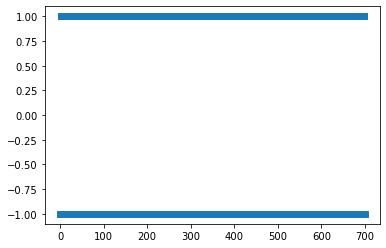

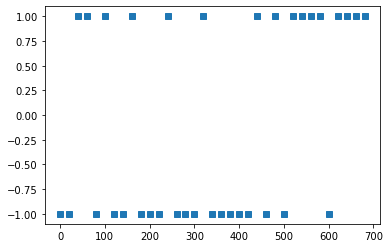

In [ ]:
nsteps = 700

randnum = random.rand(nsteps)

delx = 2*(np.round(randnum)-0.5)

print(delx.shape)

print(delx[:10])

istep = np.arange(len(x))

plt.plot(istep,delx,marker='s',linestyle="None")

plt.show()

plt.plot(istep[np.mod(istep,20)==0],delx[np.mod(istep,20)==0],marker='s',linestyle="None")

plt.show()



## 2. Calculating the mean square displacement (MSD) after 700 steps 

>np.cumsum: 누적 합을 계산
> 

In [ ]:
nsteps = 700

randnum = random.rand(nsteps)

delx = 2*(np.round(randnum)-0.5)

x = np.cumsum(delx)
    
xsq = x**2

print("After %d steps, " %(nsteps))
print("\tx(%d) = %d" %(nsteps,x[nsteps-1]))
print("\tx^2(%d) = %d" %(nsteps,xsq[nsteps-1]))

After 700 steps, 
	x(700) = 10
	x^2(700) = 100


## 3. Plotting the MSD as a function of steps

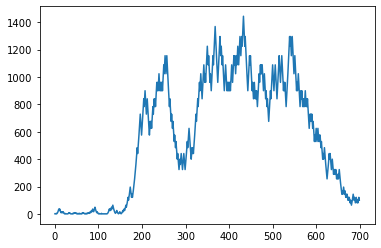

In [ ]:
istep = np.arange(len(xsq))

plt.plot(istep,xsq)

## 4. Repeating the same calculation for many different sets

>nset: number of different sets
>

In [ ]:
nset = 30
nsteps = 700

randnum = random.rand(nset,nsteps)

delx = 2*(np.round(randnum)-0.5)

x = np.cumsum(delx,axis=1)
    
xsq = x**2



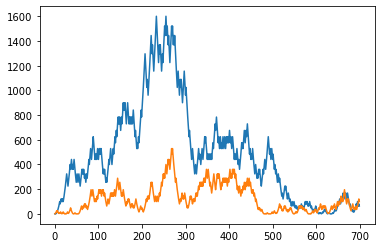

In [ ]:
istep = np.arange(len(xsq[0]))

plt.plot(istep,xsq[0])
plt.plot(istep,xsq[1])

## 5. Plotting the MSD as a function of steps

In [ ]:
msd = np.mean(xsq,axis=0)

print(msd.shape)

(700,)


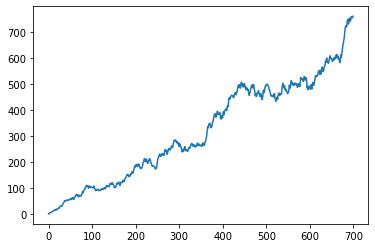

In [ ]:
istep = np.arange(len(msd))

plt.plot(istep,msd)

## 6. Calculating the diffusion coefficient by fitting the MSD to a linear line

In [ ]:
def func(x, a):
    return a * x

Fit: y = 0.923 * x 
Diff coef D = 0.461


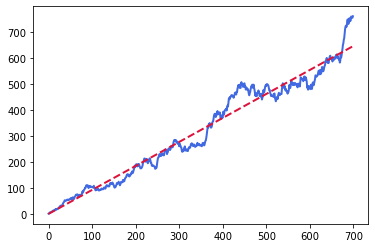

In [ ]:
istep = np.arange(len(msd))

popt, pcov = curve_fit(func,istep,msd)

print ("Fit: y = %.3f * x " %(popt[0]))

print ("Diff coef D = %.3f" %(popt[0]/2))

plt.plot(istep, msd, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(istep, func(istep,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")

plt.show()



Fit: y = 0.923 * x 
Diff coef D = 0.461


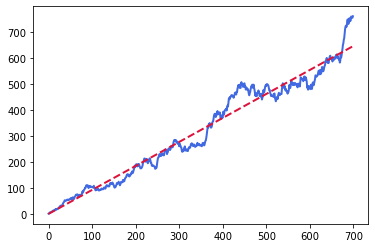

In [ ]:
istep = np.arange(len(msd))

jstep = istep[istep<300]
msdj = msd[istep<300]

popt, pcov = curve_fit(func,istep,msd)

print ("Fit: y = %.3f * x " %(popt[0]))

print ("Diff coef D = %.3f" %(popt[0]/2))

plt.plot(istep, msd, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(istep, func(istep,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")

plt.show()



In [ ]:
natoms=3000

nsteps=700

x=np.zeros((nsteps,natoms))

msd_x=np.zeros(nsteps)

for iatom in range(natoms):

    rand1=random.rand(nsteps)

    delx=(np.round(rand1)-0.5)*2

    for istep in range(nsteps):
    
        x[istep,iatom]=np.sum(delx[:istep+1])

for istep in range(nsteps):
    msd_x[istep]=np.mean(x[istep,:]**2)

plt.hist(x[nsteps-1,:],bins=20, density=True, alpha=1.0, histtype='stepfilled')
#plt.xlim([-1,1])
plt.tick_params(axis='both', labelsize=8)
plt.show()

KeyboardInterrupt: 

Fit: y = 0.984 * x 


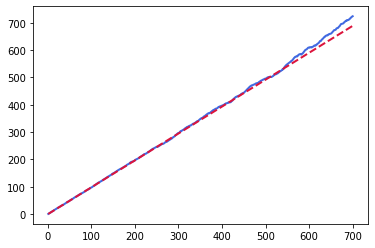

In [ ]:
def func(x, a):
    return a * x

t0=np.arange(nsteps)+1

t0_cut=t0[t0<300]
msd_x_cut=msd_x[t0<300]

popt, pcov = curve_fit(func, t0_cut, msd_x_cut)

print ("Fit: y = %.3f * x " %(popt[0]))

plt.plot(t0, msd_x, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(t0, func(t0,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")


### 3-Dim Random Walk - Mean Square Displacement
#### - Using random.rand: uniform distribution over [0,1)